In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [7]:
import pandas as pd

# Load your dataset (modify the file path as needed)
df = pd.read_csv(r"cleaned_customer_shopping_data.csv")  # Ensure the correct path

print(df.head())  # Check if df is correctly loaded


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card   2022-05-08          Kanyon  
1     Debit Card   2021-12-12  Forum Istanbul  
2           Cash   2021-09-11       Metrocity  
3    Credit Card          NaN    Metropol Avm  
4           Cash          NaN          Kanyon  


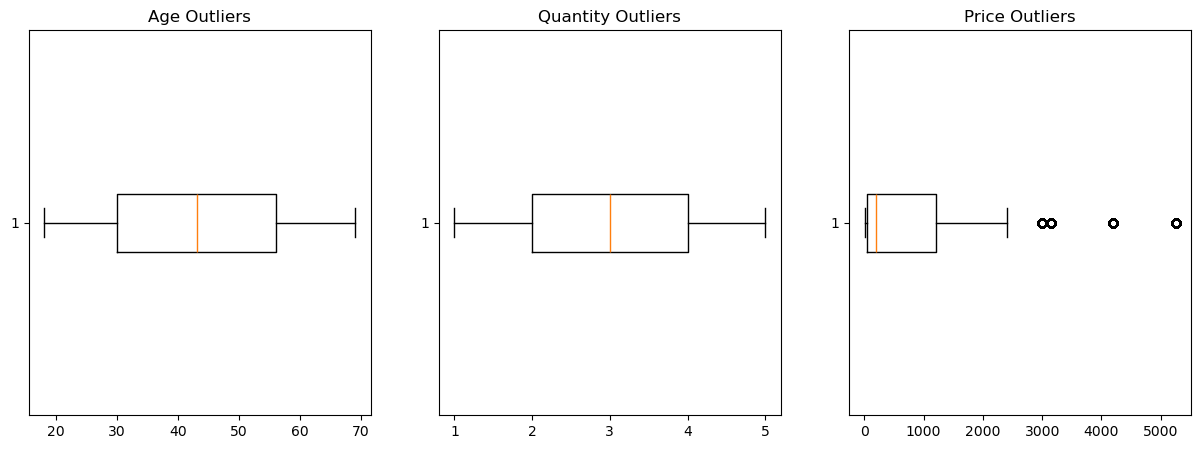

In [9]:
# Plot boxplots to check for outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age outliers
axes[0].boxplot(df['age'], vert=False)
axes[0].set_title('Age Outliers')

# Quantity outliers
axes[1].boxplot(df['quantity'], vert=False)
axes[1].set_title('Quantity Outliers')

# Price outliers
axes[2].boxplot(df['price'], vert=False)
axes[2].set_title('Price Outliers')

# Show plots
plt.show()

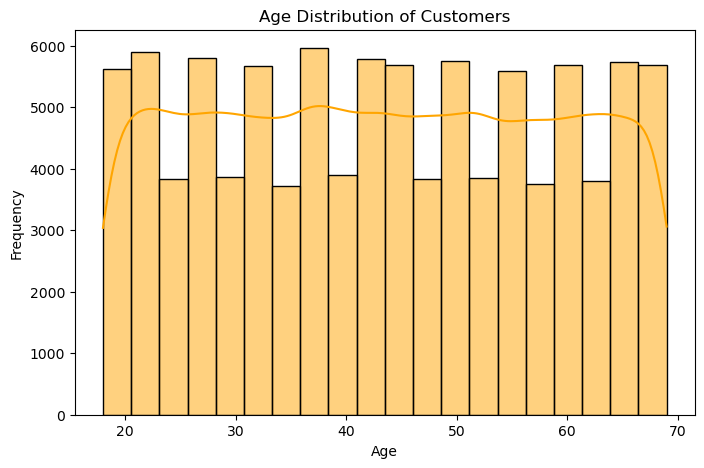

In [11]:
#Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color="orange")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


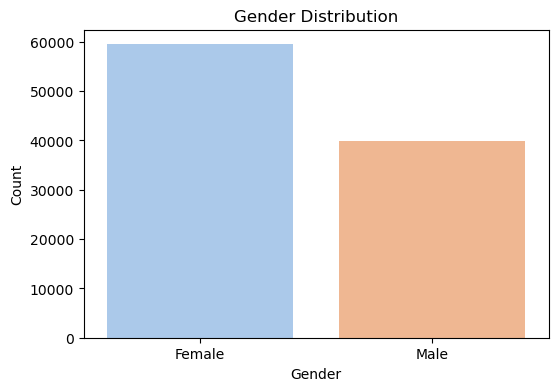

In [13]:
#Gender Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, hue='gender', palette="pastel", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



In [15]:
import seaborn as sns
print(sns.__version__)


0.13.2


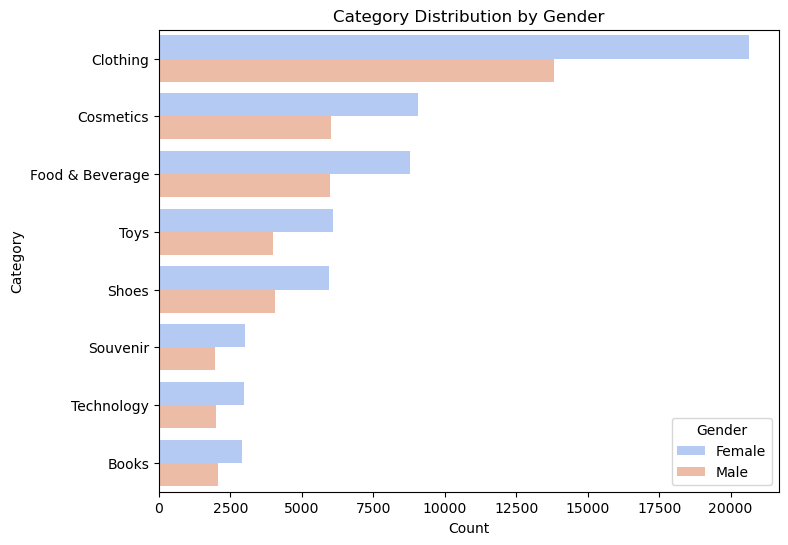

In [17]:
#most popular product 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a 'gender' column
plt.figure(figsize=(8, 6))
# Set 'hue' to the 'gender' column to differentiate counts by gender
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, hue='gender', palette="coolwarm")
plt.title("Category Distribution by Gender")
plt.xlabel("Count")
plt.ylabel("Category")
plt.legend(title='Gender')  # Optionally add a title to the legend
plt.show()


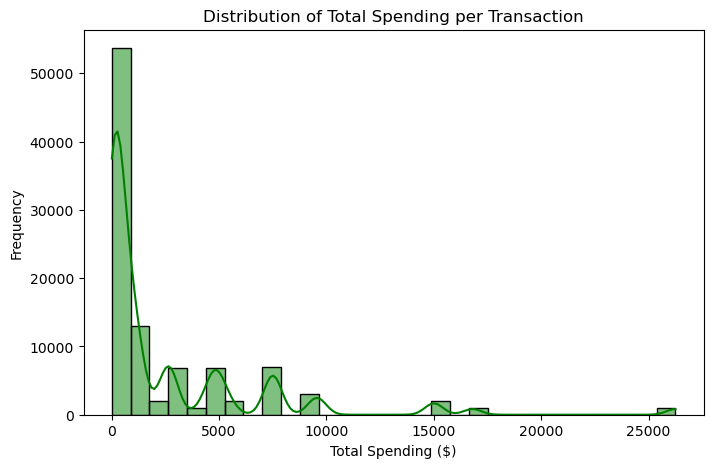

In [19]:
#Total Spending Distribution
df['total_spent'] = df['quantity'] * df['price']
plt.figure(figsize=(8, 5))
sns.histplot(df['total_spent'], bins=30, kde=True, color="green")
plt.title("Distribution of Total Spending per Transaction")
plt.xlabel("Total Spending ($)")
plt.ylabel("Frequency")
plt.show()

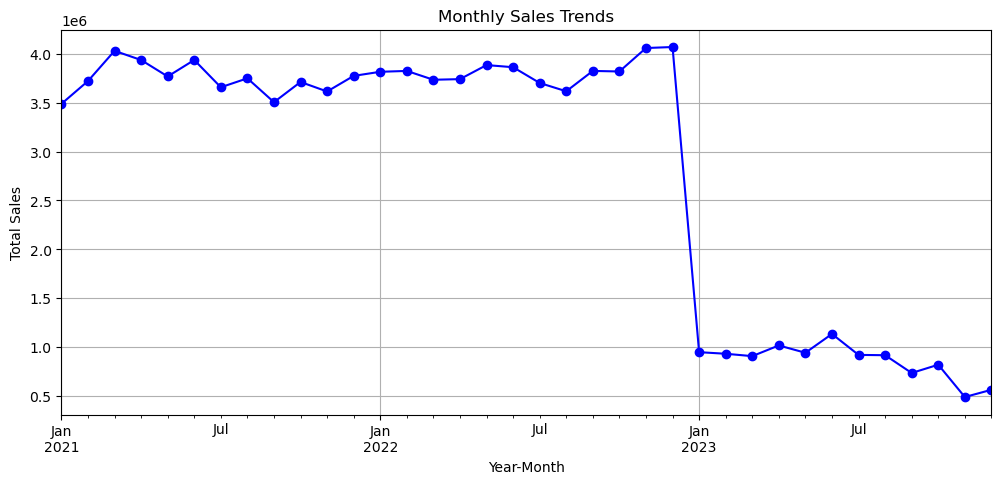

In [21]:
#Monthly Sales Trends
import pandas as pd
import matplotlib.pyplot as plt

# Ensure invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Now you can extract year-month
df['year_month'] = df['invoice_date'].dt.to_period('M')

# Group by year_month and calculate total sales
monthly_sales = df.groupby('year_month')['total_spent'].sum()

# Plot the monthly sales trends
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()
